In [3]:
import pandas as pd
import pandas_datareader.data as web
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime

plt.style.use('fivethirtyeight')
%config InlineBackend.figure_format = 'retina'
%matplotlib inline

In [4]:
btc = web.get_data_yahoo('BTC-USD', start=datetime.datetime(2020, 1, 1), end=datetime.datetime(2021, 6, 13))
btc.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2020-01-01,7254.330566,7174.944336,7194.892090,7200.174316,1.856566e+10,7200.174316
2020-01-02,7212.155273,6935.270020,7202.551270,6985.470215,2.080208e+10,6985.470215
2020-01-03,7413.715332,6914.996094,6984.428711,7344.884277,2.811148e+10,7344.884277
2020-01-04,7427.385742,7309.514160,7345.375488,7410.656738,1.844427e+10,7410.656738
2020-01-05,7544.497070,7400.535645,7410.451660,7411.317383,1.972507e+10,7411.317383


As you can see, the data has six columns. 

- `Open` for the opening price for the day, 
- `High` for the highest price during the day, 
- `Low` for the lowest price during the day,
- `Close` for the closing price for the day,
- `Volume` for transaction volume.
- `Adj Close` for the adjusted closing price, 


In stock price, adjusted closing price reflects a stock’s closing price on any given day of trading that has been amended to include any distributions and corporate actions that occurred at any time prior to the next day’s open.

In [5]:
np.sum(btc['Close'] - btc['Adj Close'])

0.0

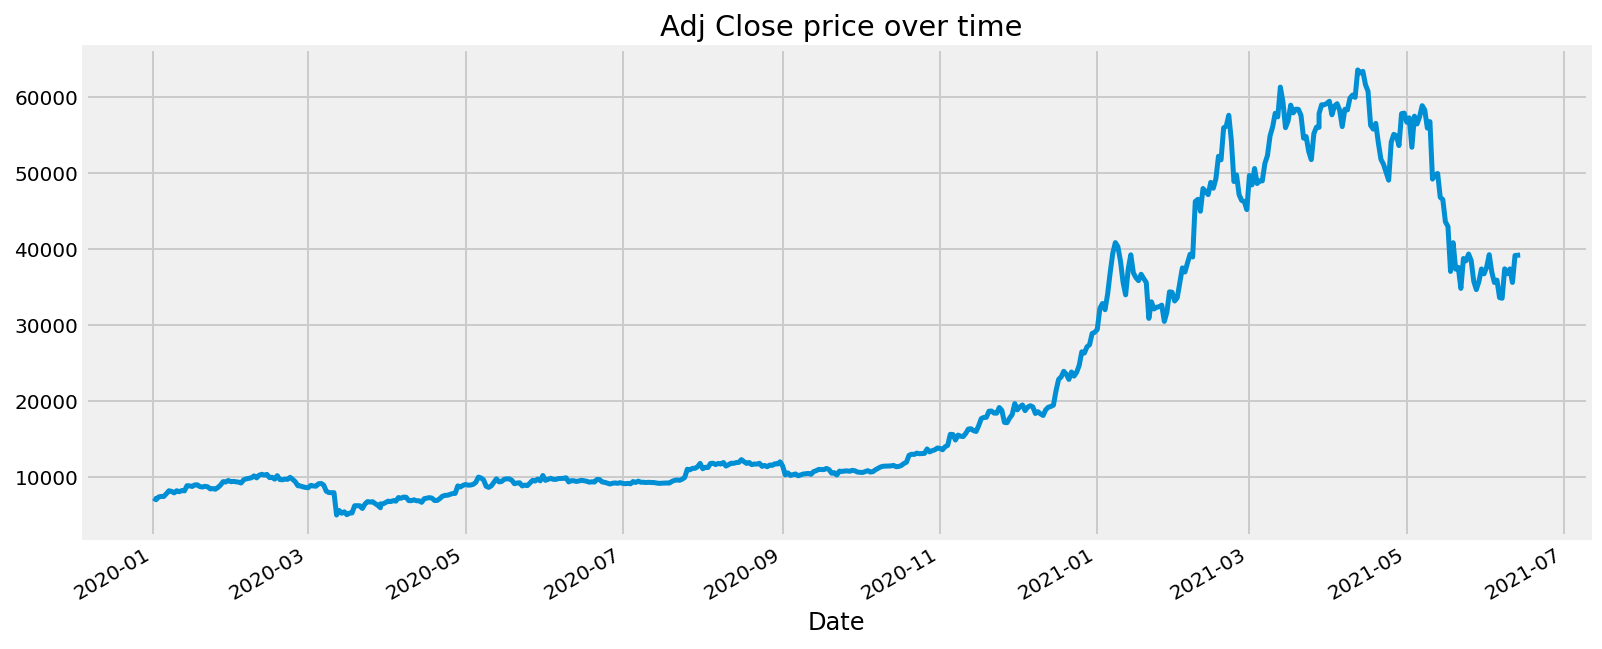

In [7]:
btc_adj = btc['Adj Close']
btc_adj.plot(lw=2.5, figsize=(12, 5) , title = ' Adj Close price over time')
plt.show()

It looks like the USD value of Bitcoin has been steady during the first half of 2020, but started to oscillate and steeply went upward from around November.

## Moving Average
One of the basic analysis technique for time series data is moving average. 
As the name suggests, rather than calculating the average on the whole dataset, moving average (also called rolling mean) calculates the average of a subset with a certain window size, and shifts forward. Moving average is used to smooth out short-term fluctuations and highlight longer-term trends or cycles.

Let’s see how moving average works on a graph by plotting price data from `01/01/2020` to `13/06/2021`. I chose from the 4th quarter of 2020 on to plot where there is a strong trend in the data to clearly see how moving average works.

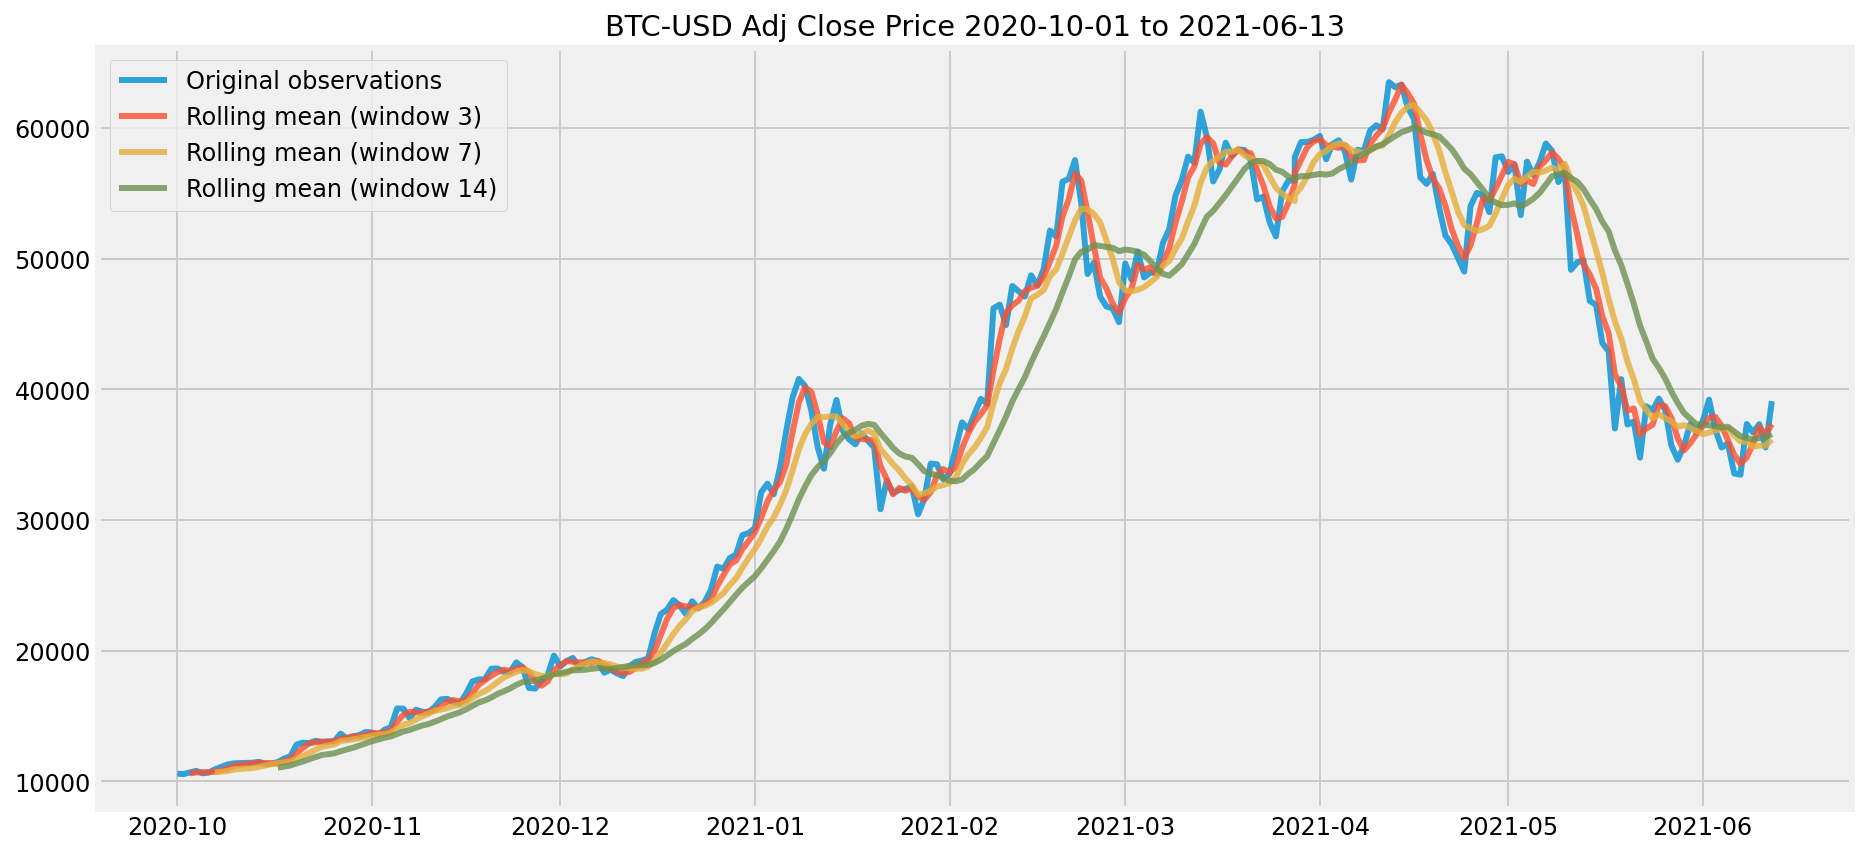

In [8]:
btc_recent = btc_adj.loc['2020-10-01':'2021-06-13']

rroll_d3 = btc_recent.rolling(window=3).mean()
rroll_d7 = btc_recent.rolling(window=7).mean()
rroll_d14 = btc_recent.rolling(window=14).mean()

plt.figure(figsize=(14, 7))
plt.plot(btc_recent.index , btc_recent , lw=3 , alpha=0.8 , label='Original observations')
plt.plot(btc_recent.index , rroll_d3 , lw=3, alpha=0.8 , label='Rolling mean (window 3)')
plt.plot(btc_recent.index , rroll_d7 , lw=3, alpha=0.8 , label='Rolling mean (window 7)')
plt.plot(btc_recent.index , rroll_d14 , lw=3, alpha=0.8 , label='Rolling mean (window 14)')

plt.title('BTC-USD Adj Close Price 2020-10-01 to 2021-06-13')
plt.tick_params(labelsize=12)
plt.legend(loc='upper left', fontsize=12)
plt.show()

Let 's try shorter time period from 2021

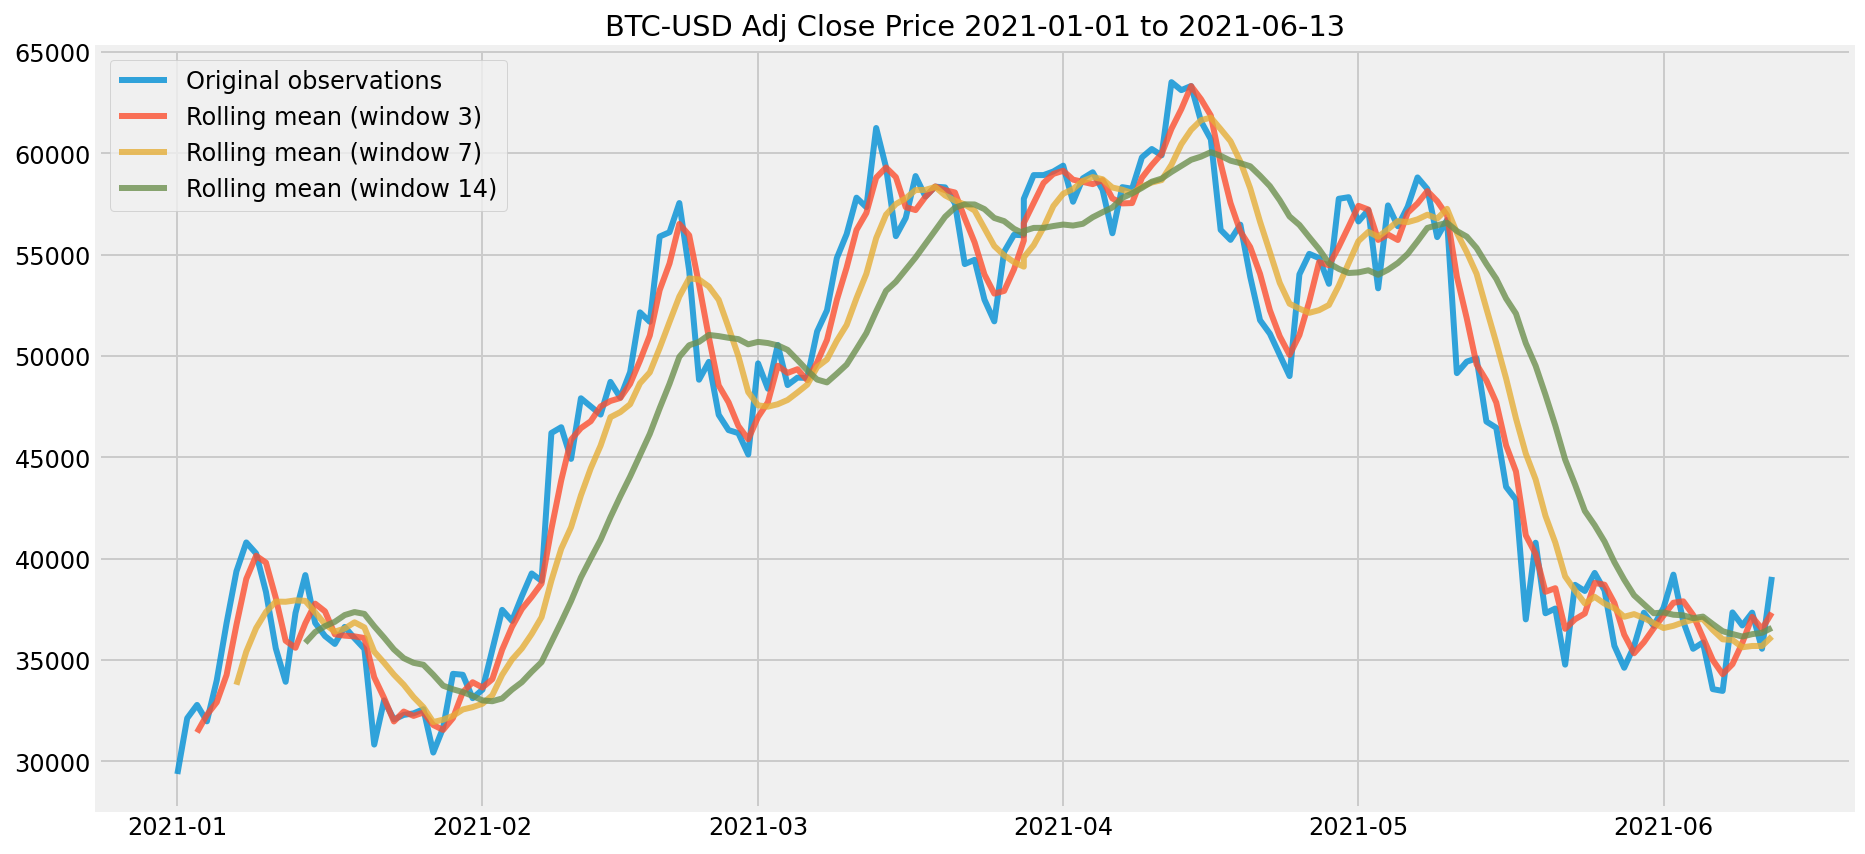

In [9]:
btc_recent = btc_adj.loc['2021-01-01':'2021-06-13']

rroll_d3 = btc_recent.rolling(window=3).mean()
rroll_d7 = btc_recent.rolling(window=7).mean()
rroll_d14 = btc_recent.rolling(window=14).mean()

plt.figure(figsize=(14, 7))
plt.plot(btc_recent.index , btc_recent , lw=3 , alpha=0.8 , label='Original observations')
plt.plot(btc_recent.index , rroll_d3 , lw=3, alpha=0.8 , label='Rolling mean (window 3)')
plt.plot(btc_recent.index , rroll_d7 , lw=3, alpha=0.8 , label='Rolling mean (window 7)')
plt.plot(btc_recent.index , rroll_d14 , lw=3, alpha=0.8 , label='Rolling mean (window 14)')

plt.title('BTC-USD Adj Close Price 2021-01-01 to 2021-06-13')
plt.tick_params(labelsize=12)
plt.legend(loc='upper left', fontsize=12)
plt.show()

Compared to the original observation, which is plotted with a blue line, we can see the curve of the lines get smoother as window sizes get bigger.

## Dual Moving Average Crossover
Another use case of moving average is in a trading strategy called dual moving average crossover. 

The concept of a dual moving average crossover is fairly straightforward. Calculate two moving averages of the price, one average would be the short term and the other long term. The long term moving average will have a lower variance and will move in the same direction as the short term moving average but at a different rate. The different rates of direction induces points where the values of the two moving averages may equal and or cross one another. These points are called the crossover points. In the dual moving average crossover trading strategy, these crossovers are points of decision to buy or sell the currencies.

Generally, in Technical Approach “A buy signal is generated when the short-term average crosses the long-term average and rises above it, while a sell signal is triggered by a short-term average crossing long-term average and falling below it”.
However, in The Value Approach it is opposite! The Value Approach offers the opposite trading signals to the Technical Approach. The Value Approach claims that when the short-term average crosses from below to above the long-term average, that the investment is now overvalued, and should be sold. Conversely when the currency short-term average moves below the long-term average then the currency is undervalued it should be bought.

In [13]:
short_window = 40
mid_window = 100
signals = pd.DataFrame(index=btc_adj.index)
signals['signal'] = 0.0
roll_d40 = btc_adj.rolling(window=short_window).mean()
roll_d100 = btc_adj.rolling(window=mid_window).mean()
signals['short_mavg'] = roll_d40
signals['mid_mavg'] = roll_d100
signals['signal'][short_window:] = np.where(signals['short_mavg'][short_window:] > signals['mid_mavg'][short_window:], 1.0, 0.0)
signals['positions'] = signals['signal'].diff()

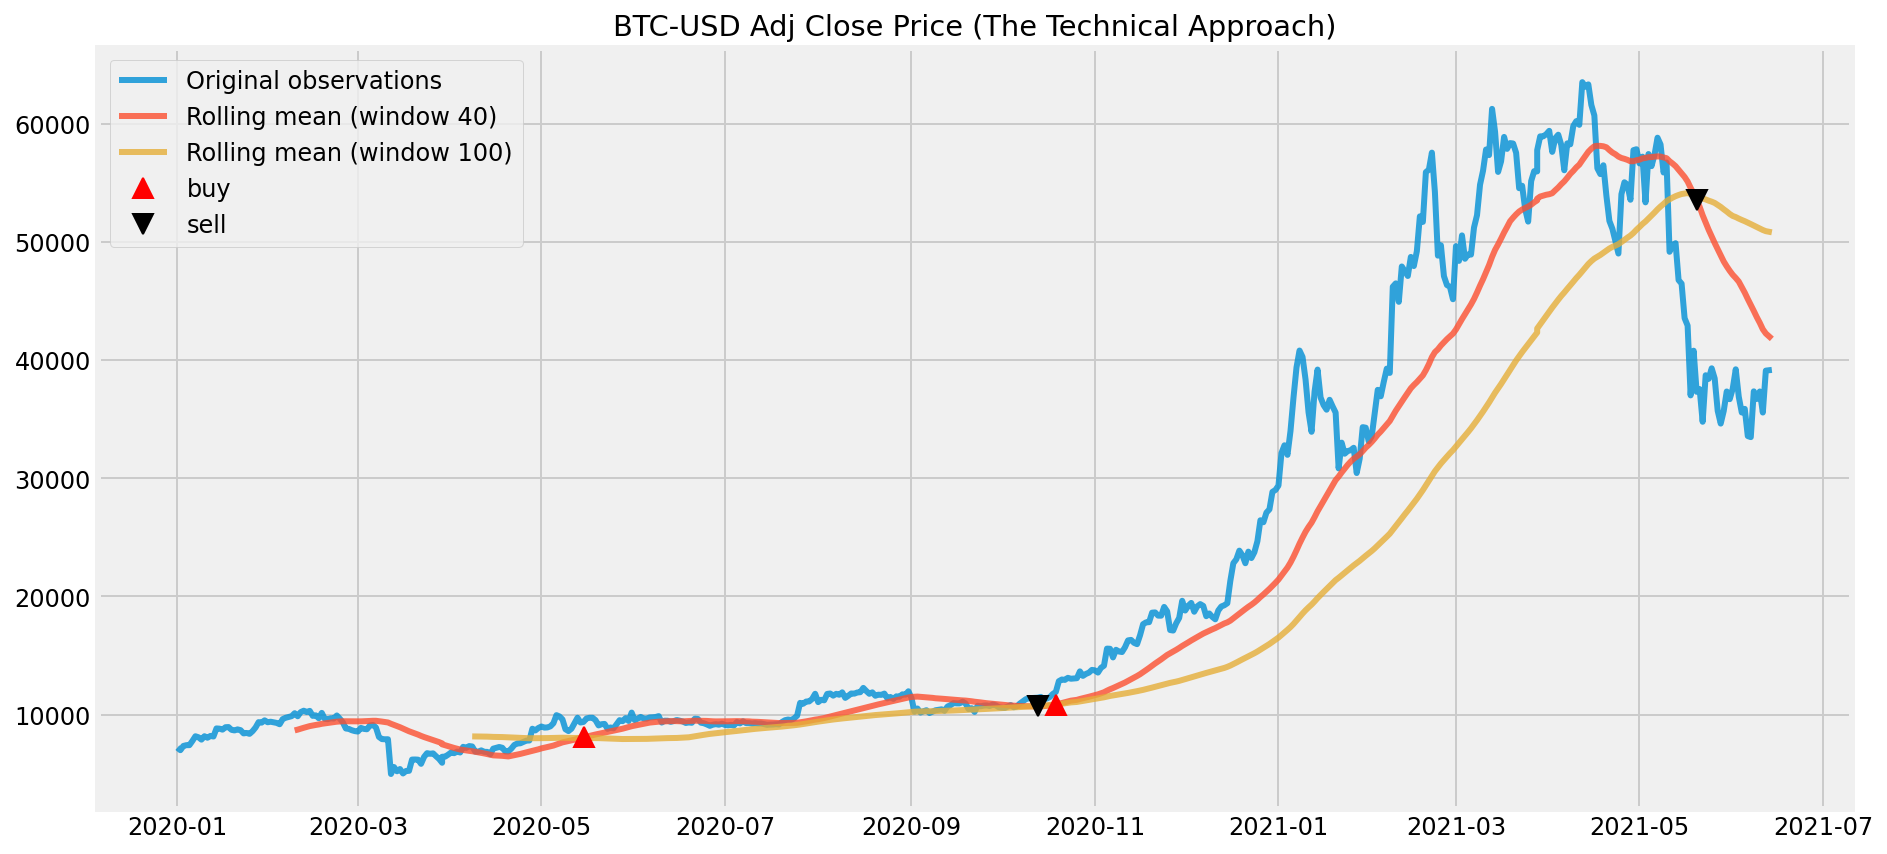

In [14]:
plt.figure(figsize=(14, 7))
plt.plot(btc_adj.index, btc_adj, lw=3, alpha=0.8,label='Original observations')
plt.plot(btc_adj.index, roll_d40, lw=3, alpha=0.8,label='Rolling mean (window 40)')
plt.plot(btc_adj.index, roll_d100, lw=3, alpha=0.8,label='Rolling mean (window 100)')
plt.plot(signals.loc[signals.positions == 1.0].index, 
         signals.short_mavg[signals.positions == 1.0],
         '^', markersize=10, color='r', label='buy')
         
plt.plot(signals.loc[signals.positions == -1.0].index, 
         signals.short_mavg[signals.positions == -1.0],
         'v', markersize=10, color='k', label='sell')
plt.title('BTC-USD Adj Close Price (The Technical Approach)')
plt.tick_params(labelsize=12)
plt.legend(loc='upper left', fontsize=12)
plt.show()

In [15]:
short_window = 10
mid_window = 50
signals = pd.DataFrame(index=btc_adj.index)
signals['signal'] = 0.0
roll_d10 = btc_adj.rolling(window=short_window).mean()
roll_d50 = btc_adj.rolling(window=mid_window).mean()
signals['short_mavg'] = roll_d10
signals['mid_mavg'] = roll_d50
signals['signal'][short_window:] = np.where(signals['short_mavg'][short_window:] > signals['mid_mavg'][short_window:], 1.0, 0.0)
signals['positions'] = signals['signal'].diff()

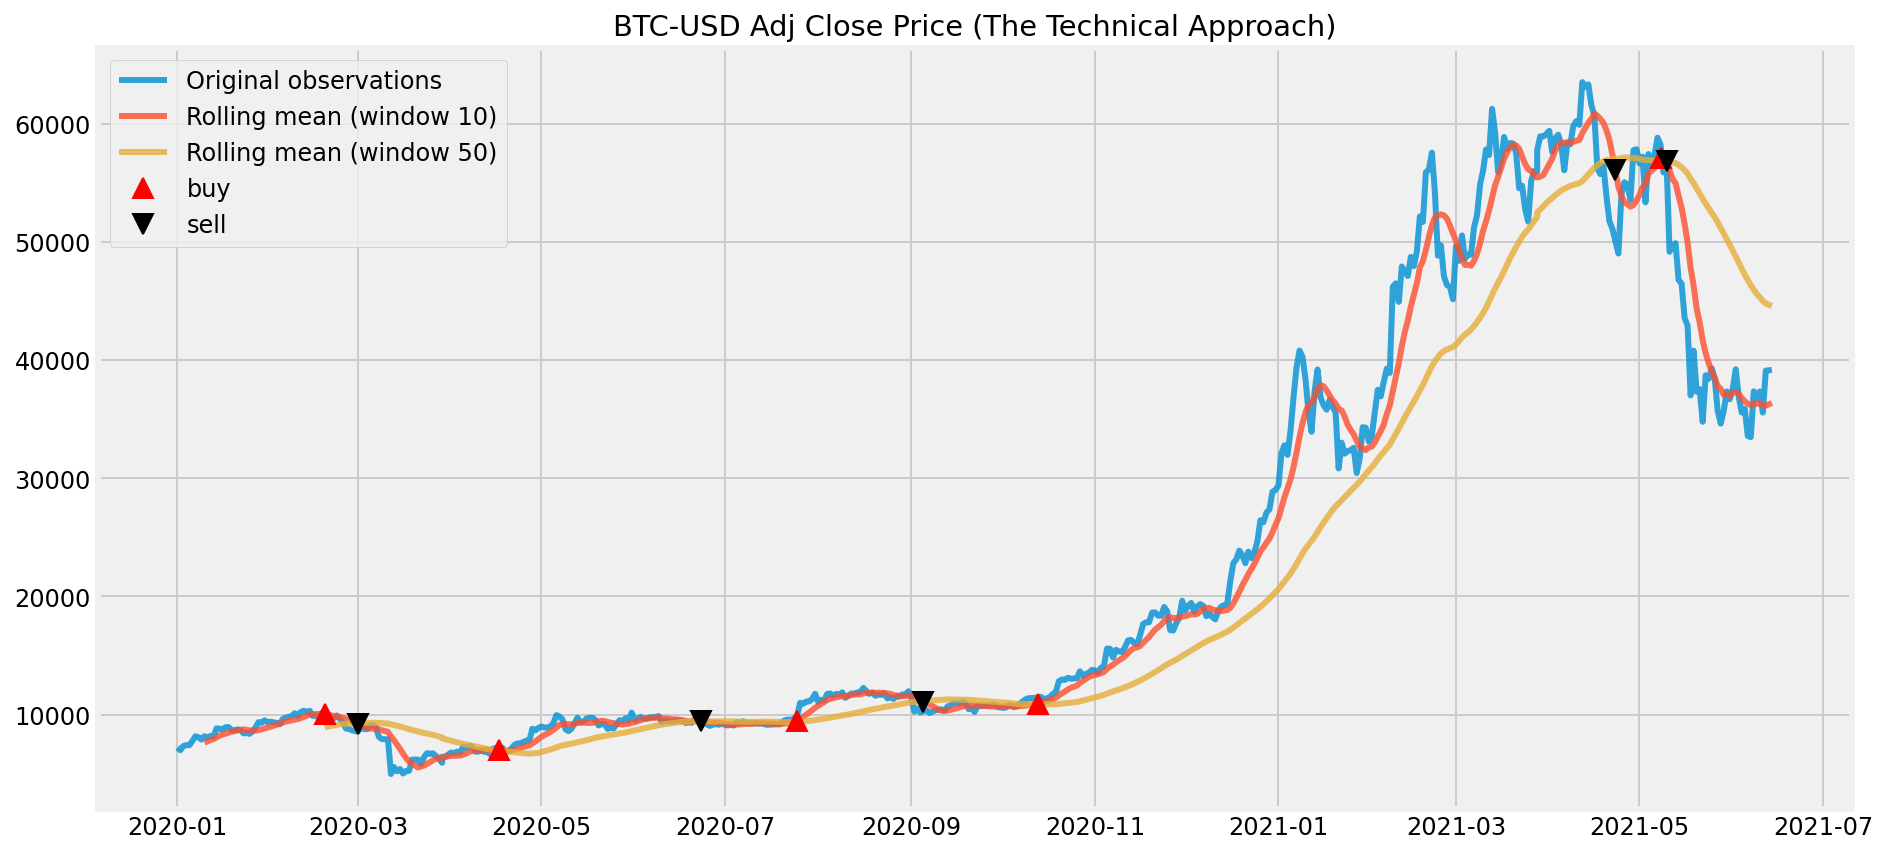

In [16]:
plt.figure(figsize=(14, 7))

plt.plot(btc_adj.index, btc_adj, lw=3, alpha=0.8,label='Original observations')
plt.plot(btc_adj.index, roll_d10, lw=3, alpha=0.8,label='Rolling mean (window 10)')
plt.plot(btc_adj.index, roll_d50, lw=3, alpha=0.8,label='Rolling mean (window 50)')

plt.plot(signals.loc[signals.positions == 1.0].index, 
         signals.short_mavg[signals.positions == 1.0],
         '^', markersize=10, color='r', label='buy')
         
plt.plot(signals.loc[signals.positions == -1.0].index, 
         signals.short_mavg[signals.positions == -1.0],
         'v', markersize=10, color='k', label='sell')

plt.title('BTC-USD Adj Close Price (The Technical Approach)')
plt.tick_params(labelsize=12)
plt.legend(loc='upper left', fontsize=12)
plt.show()

In [20]:
initial_investment = btc_adj.loc[list(signals[signals.positions == 1.0].index)][0]
bought = np.sum(btc_adj.loc[list(signals[signals.positions == 1.0].index)]*-1.0)
sold = np.sum(btc_adj.loc[list(signals[signals.positions == -1.0].index)])
current_btc_value = btc_adj[-1]
balance = pd.DataFrame([btc_adj.loc[list(signals[signals.positions == 1.0].index)]*-1.0,
              btc_adj.loc[list(signals[signals.positions == -1.0].index)]]).transpose()
balance = balance.fillna(0)
balance['balance'] = balance.sum(axis=1)
print("Initial investment amount: {0:.2f} USD".format(initial_investment))
print("Maximum invested amount: {0:.2f} USD".format(abs(min(balance.cumsum().balance))))
print("Current asset value: {0:.2f} USD".format(bought+sold+current_btc_value))

Initial investment amount: 9633.39 USD
Maximum invested amount: 18250.76 USD
Current asset value: 77613.77 USD


With The Techincal Approach, I would have started my investment with 9633.39 USD, and during the time period of a year and a half, I would have needed 18250.76 USD to keep investing, and the final value of my 1 Bitcoin would have been valued at 77613.77 USD now (13/06/2021). It might be a naive calculation, not taking into account transaction fees or other costs which might have occurred. But in a simplified calculation, not a bad investment.

If The Value Approach is applied to the same graph, the situation might not be the same. There are the concepts of “selling short” and “selling long” in finance. “Selling short an asset means selling an asset we do not currently hold and receiving its value in cash. Selling short is different than selling an asset we already own, which is called selling long.” 

From The Technical Approach, the last transaction was “sell”, but this in The Value Approach would have been “buy” instead. As you can see the price  falls.

## Exponential Moving Average
Another smoothing technique of time series data is EMA (Exponential Moving Average). The EMA is a weighted average of the last n (window size) prices, where the weighting decreases exponentially with each previous price/period. In simple words, recent prices are given more weight than past prices, and the degree of the contribution exponentially decay as the time period goes further to the past from the current observation.

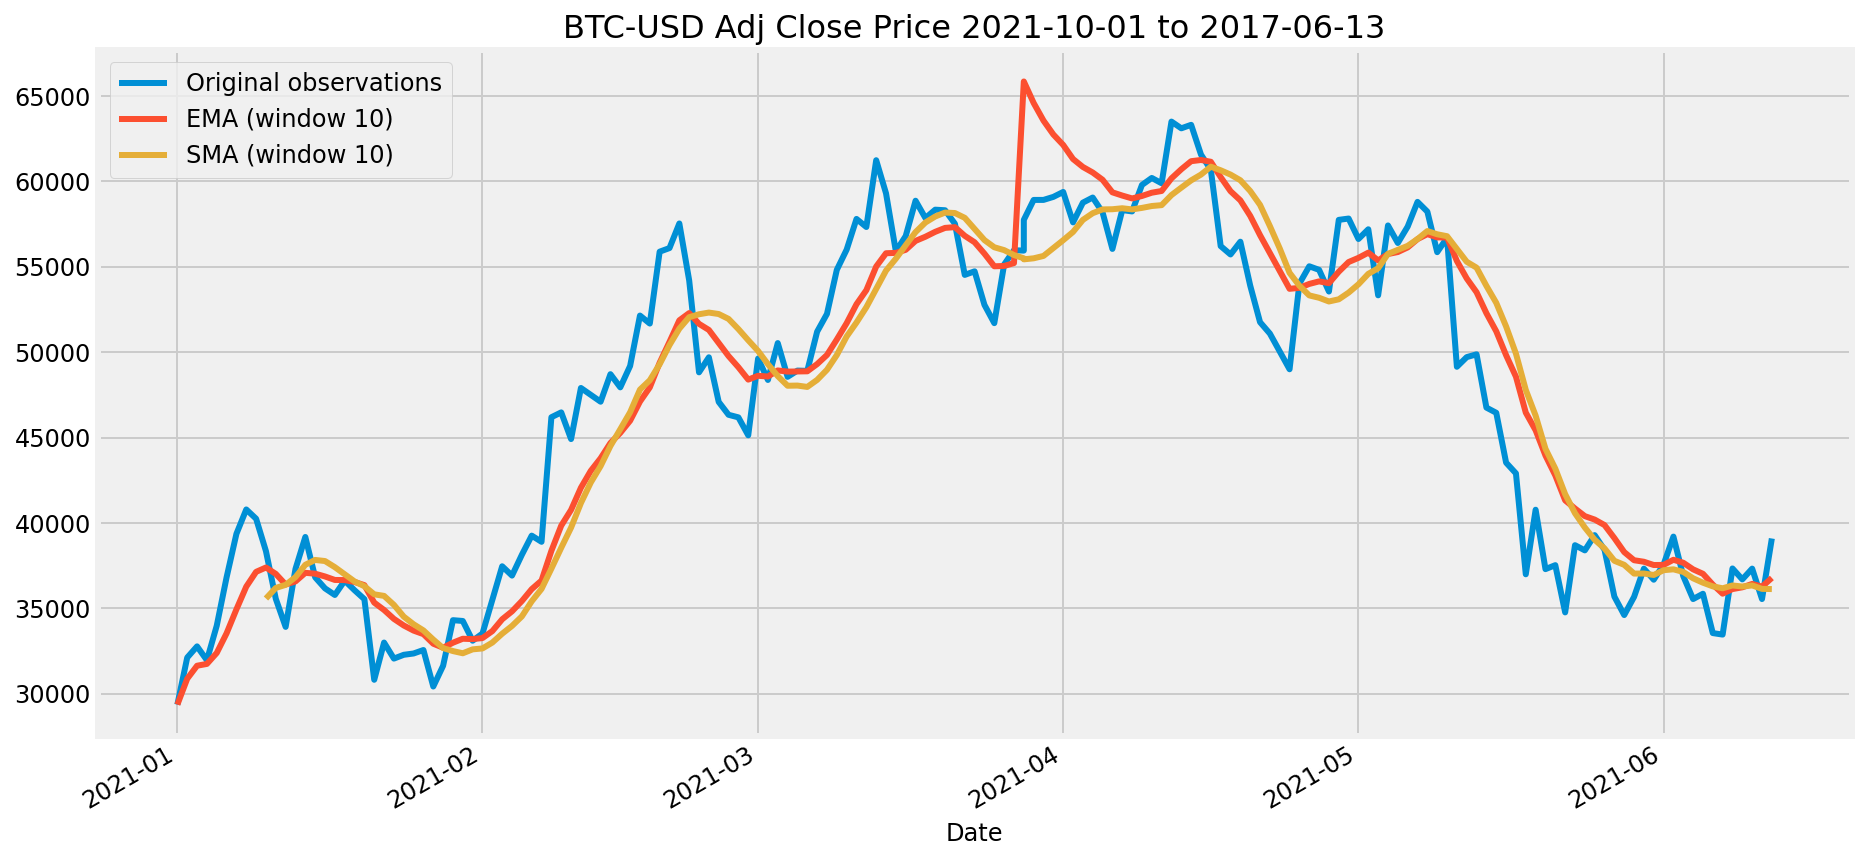

In [31]:
exp_weighted_mean = btc_recent.resample('D').sum().ewm(span=10).mean()
sma_d10 = btc_recent.rolling(window=10).mean()
ax = btc_recent.plot(lw=3, figsize=(14, 7), label='Original observations')
exp_weighted_mean.plot(ax=ax, lw=3, label='EMA (window 10)')
sma_d10.plot(ax=ax, lw=3, label='SMA (window 10)')
plt.title('BTC-USD Adj Close Price 2021-10-01 to 2017-06-13', fontsize=16)
plt.tick_params(labelsize=12)
plt.legend(loc='upper left', fontsize=12)
plt.show()

From the above chart, you can see EMA in red line catches the downwards movement in April and May faster than SMA in yellow line, and also at the very end, EMA started to catch upwards movement, while SMA still showing downwards trend.
You can apply the same logic of Dual Moving Average Crossover to the original observation and EMA. Only this time we look for the crossing points between the original observation and EMA. Let’s see how this will perform on a short-time period starting from 01/01/2020 up to 13/06/2021.

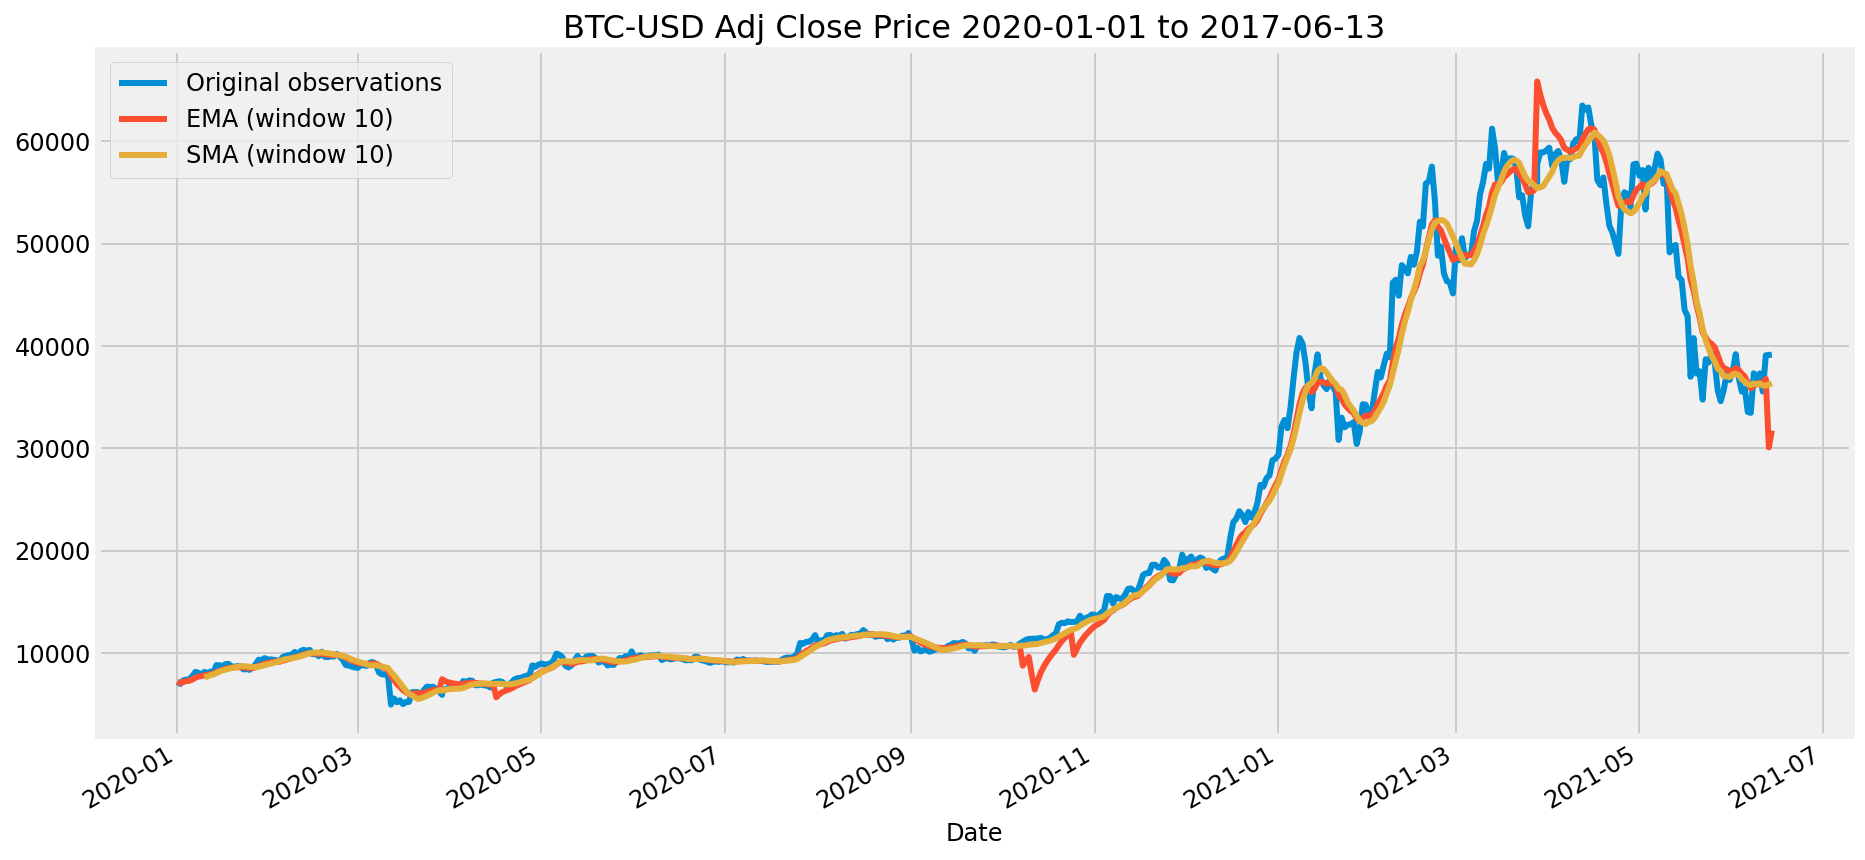

In [33]:
exp_weighted_mean = btc_adj.resample('D').sum().ewm(span=10).mean()
sma_d10 = btc_adj.rolling(window=10).mean()
ax = btc_adj.plot(lw=3, figsize=(14, 7), label='Original observations')
exp_weighted_mean.plot(ax=ax, lw=3, label='EMA (window 10)')
sma_d10.plot(ax=ax, lw=3, label='SMA (window 10)')
plt.title('BTC-USD Adj Close Price 2020-01-01 to 2017-06-13', fontsize=16)
plt.tick_params(labelsize=12)
plt.legend(loc='upper left', fontsize=12)
plt.show()

In [45]:
exp_weighted_mean = btc_recent.resample('D').sum().ewm(span=20).mean()
signals_ema = pd.DataFrame(index=btc_recent.index)
signals_ema['signal'] = 0.0
signals_ema['original'] = btc_recent
signals_ema['EMA'] = exp_weighted_mean
signals_ema['signal'] = np.where(signals_ema['original'] > signals_ema['EMA'], 1.0, 0.0)
signals_ema['positions'] = signals_ema['signal'].diff()

In [48]:
signals_ema

,signal,original,EMA,positions
Date,,,,
2021-01-01,0.0,29374.152344,29374.152344,NaN
2021-01-02,1.0,32127.267578,30819.537842,1.0
2021-01-03,1.0,32782.023438,31540.150787,0.0
2021-01-04,1.0,31971.914062,31664.794169,0.0
2021-01-05,1.0,33992.429688,32227.829393,0.0
...,...,...,...,...
2021-06-08,0.0,37345.121094,38037.273470,0.0
2021-06-09,0.0,36702.597656,37910.161474,0.0
2021-06-10,0.0,37334.398438,37855.326893,0.0


In [49]:
btc_recent

Date
2021-01-01    29374.152344
2021-01-02    32127.267578
2021-01-03    32782.023438
2021-01-04    31971.914062
2021-01-05    33992.429688
                  ...     
2021-06-08    37345.121094
2021-06-09    36702.597656
2021-06-10    37334.398438
2021-06-11    35552.515625
2021-06-12    39097.859375
Name: Adj Close, Length: 164, dtype: float64

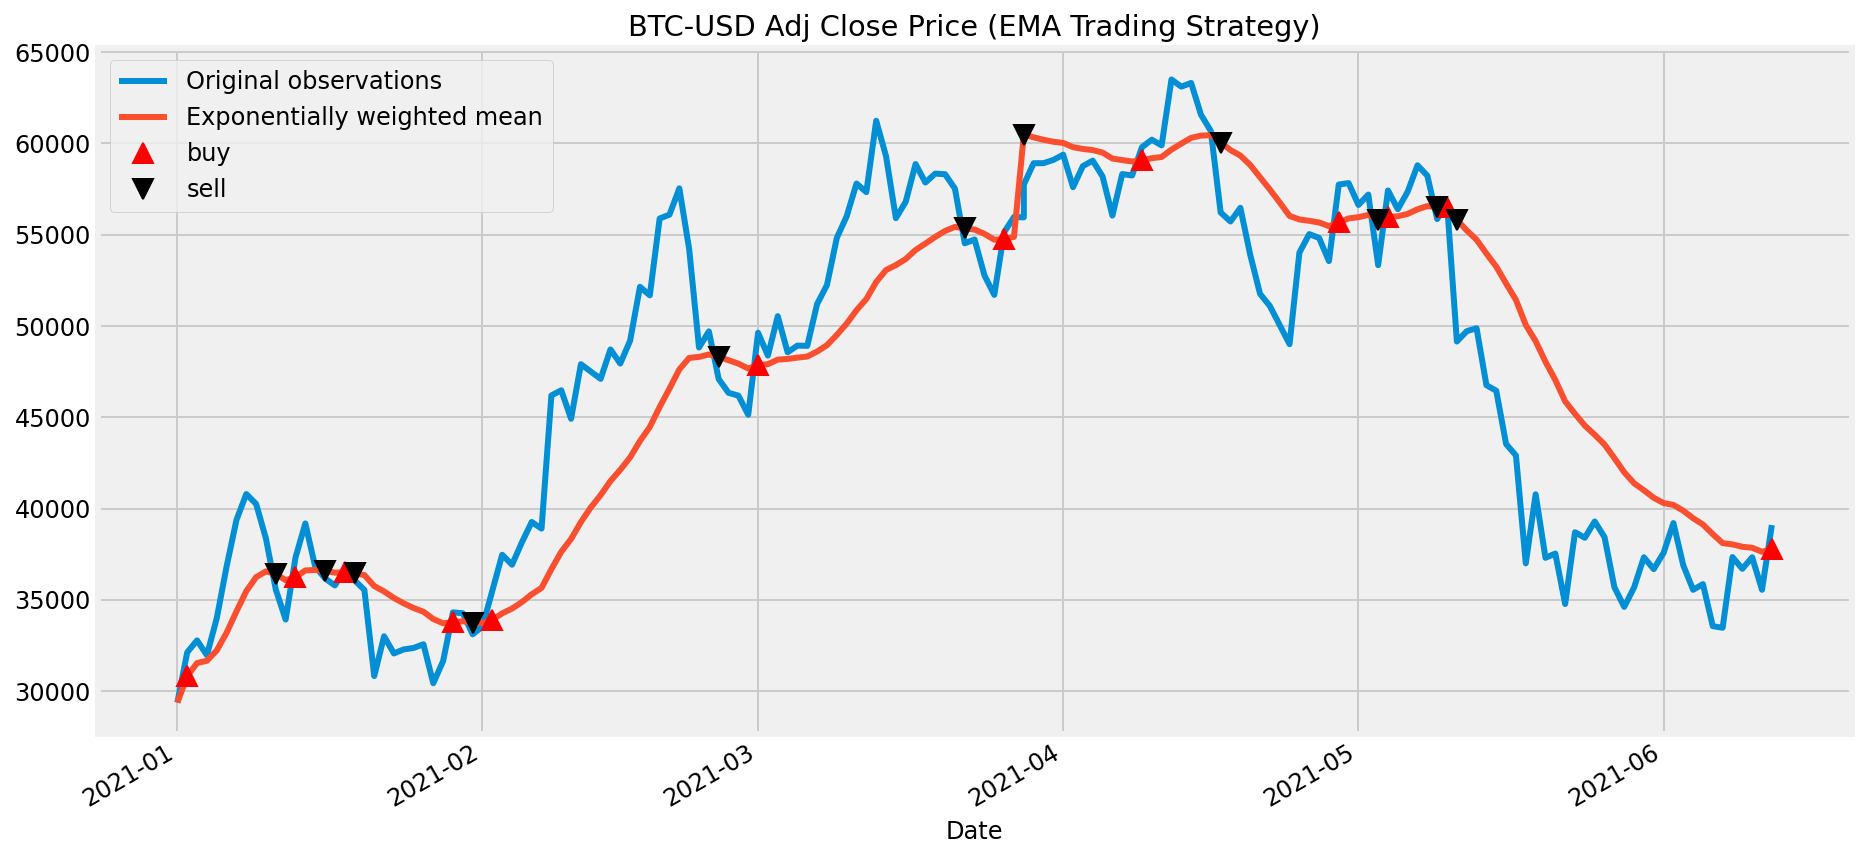

In [46]:
plt.figure(figsize=(14, 7))
ax = btc_recent.plot(lw=3, figsize=(14, 7), label='Original observations')
exp_weighted_mean.plot(ax=ax, lw=3, label='Exponentially weighted mean')
plt.plot(signals_ema.loc[signals_ema.positions == 1.0].index, 
         signals_ema.EMA[signals_ema.positions == 1.0],
         '^', markersize=10, color='r', label='buy')
         
plt.plot(signals_ema.loc[signals_ema.positions == -1.0].index, 
         signals_ema.EMA[signals_ema.positions == -1.0],
         'v', markersize=10, color='k', label='sell')
plt.title('BTC-USD Adj Close Price (EMA Trading Strategy)')
plt.tick_params(labelsize=12)
plt.legend(loc='upper left', fontsize=12)
plt.show()